In [2]:


import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
words = open('names.txt', 'r').read().splitlines()

words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [8]:
len(words)

32033

In [9]:
chars = sorted(list(set(''.join(words))))
stoi = { s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [154]:

# build dataset

block_size = 3 # ctx length: how many chars we take to predict the next one 
X, Y = [], []

for w in words:
  # print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [155]:
print(X.shape, Y.shape)
X, Y

torch.Size([228146, 3]) torch.Size([228146])


(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13],
         ...,
         [26, 26, 25],
         [26, 25, 26],
         [25, 26, 24]]),
 tensor([ 5, 13, 13,  ..., 26, 24,  0]))

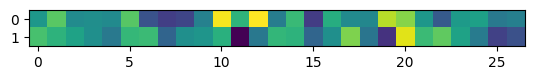

In [157]:
C = torch.randn((27, 2))

plt.imshow(C.T)

In [158]:
C[5]

tensor([1.0610, 0.7481])

In [159]:
F.one_hot(torch.tensor([ 5, 6, 7]), num_classes=27).float() @ C

tensor([[ 1.0610,  0.7481],
        [-0.9497,  0.8107],
        [-1.2522, -0.6890]])

In [118]:
emb = C[X]
emb.shape

torch.Size([16, 5, 2])

In [119]:
C[[5, 6, 7]] == F.one_hot(torch.tensor([ 5, 6, 7]), num_classes=27).float() @ C # indexing is basically matrix multiplication!!!!!!!!!!!

tensor([[True, True],
        [True, True],
        [True, True]])

In [120]:
C[X]

tensor([[[ 1.8538,  0.3457],
         [ 1.8538,  0.3457],
         [ 1.8538,  0.3457],
         [ 1.8538,  0.3457],
         [ 1.8538,  0.3457]],

        [[ 1.8538,  0.3457],
         [ 1.8538,  0.3457],
         [ 1.8538,  0.3457],
         [ 1.8538,  0.3457],
         [ 1.0162, -0.3227]],

        [[ 1.8538,  0.3457],
         [ 1.8538,  0.3457],
         [ 1.8538,  0.3457],
         [ 1.0162, -0.3227],
         [ 0.9725, -0.4368]],

        [[ 1.8538,  0.3457],
         [ 1.8538,  0.3457],
         [ 1.0162, -0.3227],
         [ 0.9725, -0.4368],
         [ 0.9725, -0.4368]],

        [[ 1.8538,  0.3457],
         [ 1.0162, -0.3227],
         [ 0.9725, -0.4368],
         [ 0.9725, -0.4368],
         [-0.9366, -0.0159]],

        [[ 1.8538,  0.3457],
         [ 1.8538,  0.3457],
         [ 1.8538,  0.3457],
         [ 1.8538,  0.3457],
         [ 1.8538,  0.3457]],

        [[ 1.8538,  0.3457],
         [ 1.8538,  0.3457],
         [ 1.8538,  0.3457],
         [ 1.8538,  0.3457],
  

In [121]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

emb.shape

torch.Size([16, 5, 2])

In [122]:
# h = emb.view(emb.shape[0], 6) @ W1 + b1
h = emb.view(-1, 6) @ W1 + b1 # pytorch will derive what -1 is should be
h = torch.tanh(h) # activate
# h = torch.relu(h) # activate

RuntimeError: shape '[-1, 6]' is invalid for input of size 160

In [123]:
h, h.shape

(tensor([[ 1.0000,  1.0000, -0.4659,  ..., -1.0000, -0.9999, -0.9995],
         [ 0.9993,  1.0000, -0.9928,  ..., -1.0000, -0.9989, -0.9999],
         [ 0.2608,  0.9994, -0.9929,  ..., -0.9916, -0.3320, -1.0000],
         ...,
         [-1.0000, -0.9540,  0.7247,  ...,  0.9996,  0.9960,  0.9898],
         [-1.0000, -0.9978,  0.9505,  ...,  0.9990,  1.0000, -0.6791],
         [-0.9998, -1.0000,  0.4395,  ...,  0.9971,  0.9999,  0.9999]]),
 torch.Size([32, 100]))

In [91]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [92]:
logits = h @ W2 + b2

In [93]:
logits, logits.shape

(tensor([[-4.2662e-01, -8.9303e+00, -7.7813e+00, -1.7181e+01,  9.5200e+00,
          -1.5482e+01, -1.7980e+01, -3.3677e+00,  4.2612e+00, -6.7466e+00,
          -1.3978e+00,  4.0673e+00,  6.8487e-01, -4.7868e+00,  1.2902e+01,
          -4.2402e+00,  1.3204e+00, -7.0636e+00, -3.8018e+00, -6.7801e+00,
          -2.3382e+01, -6.0257e-01,  5.9234e+00, -4.2173e+00,  2.2128e+00,
          -3.3702e+00, -1.8115e+01],
         [-1.1605e+01, -1.0018e+01, -5.4519e+00, -1.8666e+01,  4.2371e+00,
          -1.5040e+01, -2.0843e+01,  2.5892e+00,  1.1168e+00, -7.6211e+00,
          -1.8843e+00,  3.6038e+00, -1.5886e-01, -3.2294e+00,  1.2787e+01,
          -6.3834e+00,  1.8909e+00, -6.4268e+00, -1.7399e+00, -5.0459e+00,
          -2.2006e+01,  3.6385e+00,  3.1106e-01, -1.1376e+01,  6.9444e+00,
          -7.3056e+00, -6.3611e+00],
         [-1.3691e+01, -3.7486e+00, -9.9078e+00, -1.6743e+01,  1.3248e+00,
          -7.2628e+00, -1.5501e+01,  7.5653e+00,  4.9044e+00, -1.7159e+00,
          -7.2896e+00,  8.

In [94]:
counts = logits.exp()

In [95]:
prob = counts / counts.sum(1, keepdims=True)


In [96]:
prob.shape

torch.Size([32, 27])

In [98]:
nll = -prob[torch.arange(32), Y].log().mean()

tensor(-16.8830)

In [124]:
X.shape, Y.shape

(torch.Size([16, 5]), torch.Size([16]))

In [246]:

# define the network
g = torch.Generator().manual_seed(214783647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)

W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [ C, W1, b1, W2, b2]

In [247]:
for p in parameters:
  p.requires_grad = True

sum(p.nelement() for p in parameters)

11897

In [248]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

In [249]:
block_size = 3 # context length

def build_dataset(words):
  X, Y = [], []

  for w in words: 
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]
  
  X, Y = torch.tensor(X), torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random

random.seed(42)
random.shuffle(words)

n1 = int(0.8*len(words)) # marker at 80%
n2 = int(0.9*len(words)) # marker at 90%

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182691, 3]) torch.Size([182691])
torch.Size([22793, 3]) torch.Size([22793])
torch.Size([22662, 3]) torch.Size([22662])


In [250]:
lri = []
lossi = []
stepi = []

In [266]:
def train(X, Y, steps=10_100, lr=0.1, lr_decay = 0.1):
  # forward pass
  for p in parameters:
    p.requires_grad = True

  for i in range(steps):
    # minibatch
    ix = torch.randint(0, X.shape[0], (32,))

    # emb = C[X] # (32, 3, 2)
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100) also pytorch derives the -1 dim
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])

    # backward pass
    for p in parameters:
      p.grad = None

    loss.backward()

    # lr = lr / (lr_decay * i)
    for p in parameters:
      p.data += -lr * p.grad
    
    stepi.append(i)
    lossi.append(loss.log10().item())




train(Xtr, Ytr, steps=100_000, lr=0.001)

emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100) also pytorch derives the -1 dim
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1463, grad_fn=<NllLossBackward0>)

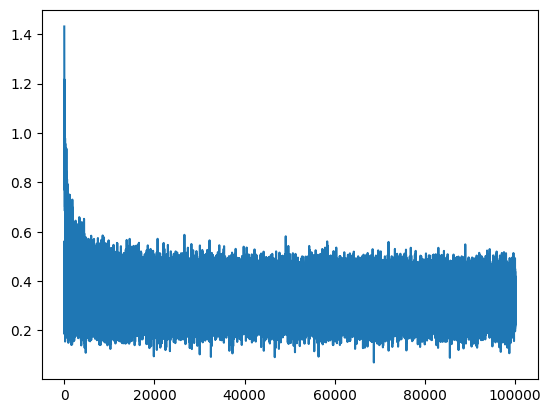

In [267]:
plt.plot(stepi, lossi)


In [268]:
# calc loss on train data
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100) also pytorch derives the -1 dim
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0901, grad_fn=<NllLossBackward0>)

In [271]:
# sample from the model

g = torch.Generator().manual_seed(2147483647 + 10)
SAMPLES = 50

for _ in range(SAMPLES):
  out = []
  context = [0] * block_size # initialize with all...

  while True:
    emb = C[torch.tensor([context])] # (1,block_size,d)
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2

    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()

    context = context[1:] + [ix]
    out.append(ix)

    if ix == 0: break

  print(''.join(itos[i] for i in out))

carmah.
amelle.
khi.
mili.
taty.
skanden.
jazhunnferlynn.
jareei.
nellara.
chaily.
kaleigh.
ham.
join.
quint.
sulie.
alian.
quintero.
dearyxix.
kael.
dura.
med.
edi.
abetteley.
frana.
aseiva.
husya.
pamior.
zer.
coj.
mikaasiren.
kalla.
luco.
zoe.
silora.
krynde.
mollianray.
kaeleyoq.
riya.
braya.
kemelandreimi.
der.
ranisly.
kemer.
zakingjadee.
kailsa.
aimonte.
evrin.
paryah.
oron.
jayce.
